## Data Preprocessing

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from src.dataProcessor.DataProcessor import DataProcessor
from src.utils.util import *

In [4]:
df = pd.read_csv("../data/multiclass1.csv")
df.shape
# df_oot=pd.read_csv('../df_oot.csv',index_col=0)
# df.shape,df_oot.shape

(268167, 87)

In [5]:
df.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,75131.53,0.000000,0.00,0,0,0.0,74.00,20,0.003143,0.000000,...,0.000000,33,1,1,0,0,0,0.0,0.0,condition
1,12384.60,0.112823,0.00,1,0,0.0,1500.25,17,0.121512,0.089448,...,0.134226,33,0,0,0,0,0,0.0,0.0,neg
2,733.00,0.000000,0.00,0,0,0.0,209.00,3,0.291899,0.000000,...,0.000000,33,0,0,0,0,0,0.0,0.0,neg
3,882.36,0.052124,0.00,2,0,0.0,599.99,7,0.491324,0.031178,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
4,3599.98,0.270178,8.17,2,0,0.0,15.99,45,0.021619,0.232532,...,0.365031,15,0,0,0,0,0,0.0,0.0,neg


In [6]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_train.shape, df_test.shape

((241350, 87), (26817, 87))

In [7]:
label_cols = ["is_abuse", "condition", "e90", "ce90", "conc", "si90", "csi90"]
label_col_multiclass = "multiclass"

train_cols = []
for i in df_train.columns:
    if i != label_col_multiclass and i not in label_cols:
        train_cols.append(i)
len(train_cols)

79

In [8]:
X_train = df_train[train_cols]
Y_train = df_train[label_cols]
X_test = df_test[train_cols]
Y_test = df_test[label_cols]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((241350, 79), (241350, 7), (26817, 79), (26817, 7))

In [9]:
Y_train

,is_abuse,condition,e90,ce90,conc,si90,csi90
137669,0,0,0,0,0,0.0,0.0
129117,0,0,0,0,0,0.0,0.0
87077,1,1,0,0,0,0.0,0.0
266031,0,0,0,0,0,0.0,0.0
18128,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
119879,0,0,0,0,0,0.0,0.0
259178,1,1,0,0,0,1.0,0.0
131932,0,0,0,0,0,0.0,0.0
146867,0,0,0,0,0,0.0,0.0


## Baseline Single Lgb Models （ignore it for now）

In [9]:
#!pip install lightgbm

In [11]:
from src.model.LgbBaseline import LgbBaseline

In [17]:
params = {
    "metric": "auc",
    "max_depth": 16,
    "learning_rate": 0.05,
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbose": -1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 500,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 25,
    "num_threads": 75,
    "metric_freq": 10,
    "data_random_seed": 17,
    "objective": "binary",
}

In [20]:
base = LgbBaseline(X_train, Y_train, X_test, Y_test, params)

AttributeError: 'DataFrame' object has no attribute 'paymeth'

In [33]:
base.baseline_model()

Overall lgb result: 
[50]	valid_0's auc: 0.975465
[100]	valid_0's auc: 0.980027
[150]	valid_0's auc: 0.982117
[200]	valid_0's auc: 0.983303
[250]	valid_0's auc: 0.984009
[300]	valid_0's auc: 0.9845
[350]	valid_0's auc: 0.984846
[400]	valid_0's auc: 0.985111
[450]	valid_0's auc: 0.985315
[500]	valid_0's auc: 0.985475
[550]	valid_0's auc: 0.985598
[600]	valid_0's auc: 0.985698
[650]	valid_0's auc: 0.985779
[700]	valid_0's auc: 0.985854
[750]	valid_0's auc: 0.985924
[800]	valid_0's auc: 0.985976
[850]	valid_0's auc: 0.986035
[900]	valid_0's auc: 0.986092
[950]	valid_0's auc: 0.986132
[1000]	valid_0's auc: 0.98618
test metrics: 0.986146307461053 0.125007021152576 0.9695490617646836
CC single lgb result: 
[50]	valid_0's auc: 0.97512
[100]	valid_0's auc: 0.979488
[150]	valid_0's auc: 0.981405
[200]	valid_0's auc: 0.982323
[250]	valid_0's auc: 0.982841
[300]	valid_0's auc: 0.983166
[350]	valid_0's auc: 0.983391
[400]	valid_0's auc: 0.983545
[450]	valid_0's auc: 0.983646
[500]	valid_0's auc: 0

## Weighted MTGBM with KD Loss Implementation

In [360]:
# ---- This chunck is for reloading updated classes when you want to change parameters in model or objective function.

import importlib
import src

importlib.reload(src.lossFunction.customLossKDswap)
importlib.reload(src.model.Mtgbm)

<module 'src.model.Mtgbm' from '/home/ec2-user/SageMaker/SecureAISandbox-CodeCommitRepository-shemingx-us-east-1/Multitask_learning/PFOC/mtgbm/src/model/Mtgbm.py'>

In [10]:
import os

In [11]:
os.getcwd()

'/home/ec2-user/SageMaker/SecureAISandbox-CodeCommitRepository-shemingx-us-east-1/Multitask_learning/PFOC/mtgbm'

In [12]:
from src.lossFunction.customLossKDswap import custom_loss_KDswap
from src.model.Mtgbm import MtGbm

In [13]:
# pip install wheel

In [14]:
# pip install lightgbm

In [15]:
Y_train.shape[1] - 1

6

In [30]:
mt_params = {
    "objective": "custom",
    "num_labels": Y_train.shape[1] - 1,
    "tree_learner": "serial2",
    "boosting": "gbdt",
    "max_depth": 16,
    "learning_rate": 0.05,  # 0.03
    "bagging_fraction": 0.9,
    "feature_fraction": 0.9,
    "verbosity": 1,
    "lambda_l1": 0.5,
    "lambda_l2": 0.05,
    "num_leaves": 750,  # 750,
    "min_child_weight": 0.1,
    "min_data_in_leaf": 100,  # 100,
    "num_threads": 80,
    "metric_freq": 10,
    "data_random_seed": 17,
    "verbose_eval": 50,
    "num_rounds": 180,
    "early_stopping_rounds": -1,
}
main_target = "is_abuse"
targets = ["condition", "e90", "ce90", "conc", "si90", "csi90"]

In [31]:
mtg = MtGbm(
    mt_params, X_train, Y_train, X_test, Y_test, main_target, targets, "auto_weight"
)

### Model training

Training set size:  (241350, 79)
Training main task shape:  241350  Training sub tasks shape:  (241350, 6)
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Info] Total Bins 11796
[LightGBM] [Info] Number of data points in the train set: 217215, number of used features: 67
[LightGBM] [Info] Length of label is not same with #data
[LightGBM] [Warning] Using self-defined objective function
--- task eval score:  [0.6903 0.7434 0.7234 0.753  0.6629 0.6363 0.6426]
--- task eval score:  [0.7008 0.7498 0.7708 0.7201 0.6815 0.6498 0.6253]
--- task eval score:  [0.7044 0.7548 0.7845 0.7577 0.6837 0.6593 0.652 ]
--- task eval score:  [0.7056 0.7566 0.8059 0.7935 0.6937 0.6645 0.6545]
--- task eval score:  [0.7094 0.7585 0.8144 0.7965 0.6946 0.6647 0.6859]
--- task eval score:  [0.7122 0.7585 0.8185 0.7887 0.6954 0.6666 0.6721]
--- task eval score:  [0.7145 0.7593 0.8357 0.804  0.6979 0.6654 0.6956]
--- task eval score: 

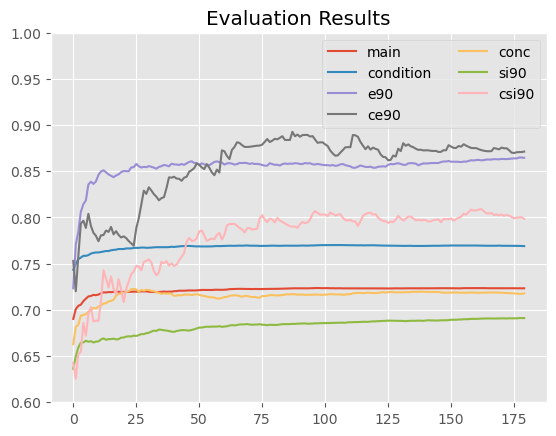

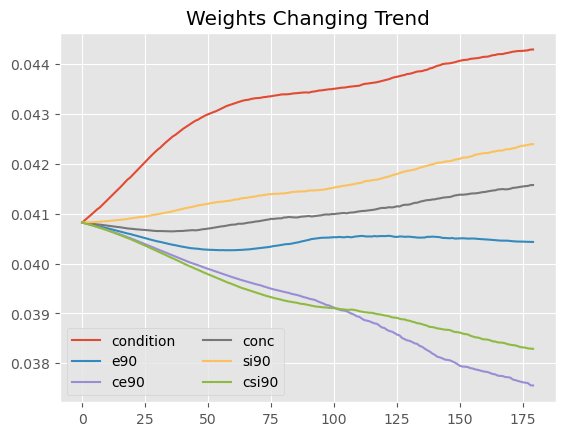

In [32]:
mtg.train()

### Model prediction

In [33]:
mtg.predict()

Test set size:  (26817, 79)
Test main task shape:  26817  Test sub tasks shape:  (26817, 6)
inner_predict 187719
main task test metrics:  AUC  0.7162679150885778  logloss  0.41364899091216767  f1 score  0.16001506024096385


In [34]:
mtg.df_pred

,is_abuse,condition,e90,ce90,conc,si90,csi90
0,0.070718,0.037485,0.001247,0.000745,0.011287,0.046265,0.000946
1,0.116172,0.064038,0.002734,0.001098,0.012910,0.059350,0.000863
2,0.108987,0.039475,0.002930,0.001516,0.019764,0.056085,0.003032
3,0.740141,0.521142,0.014435,0.001421,0.064510,0.394548,0.000714
4,0.116383,0.049084,0.001741,0.000569,0.015178,0.059622,0.001061
...,...,...,...,...,...,...,...
26812,0.030147,0.014629,0.001750,0.000950,0.003695,0.013729,0.001639
26813,0.112919,0.036965,0.001980,0.001076,0.013520,0.047165,0.002710
26814,0.285616,0.243619,0.007269,0.005461,0.029104,0.046056,0.002295
26815,0.401884,0.332113,0.009966,0.001196,0.014423,0.033373,0.000787


In [35]:
df_test = df_test.reset_index(drop=True)
df_test.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,6320.14,0.000000,0.00,1,0,0.00,99.99,69,0.030656,0.009933,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
1,583.68,0.368828,0.00,1,0,0.00,74.90,3,0.238763,0.147170,...,0.368828,32,0,0,0,0,0,0.0,0.0,neg
2,14244.57,0.145813,0.91,4,0,0.00,116.97,100,0.033197,0.099688,...,0.074230,15,0,0,0,0,0,0.0,0.0,neg
3,4734.09,0.595828,7.57,11,0,18.44,39.99,37,0.015218,0.512988,...,0.733209,15,0,0,0,0,0,0.0,0.0,neg
4,2712.09,0.000000,0.00,0,0,36.98,31.99,20,0.023149,0.068692,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg


In [36]:
df_test.head()

,Abuse__DOT__completed_afn_orders_by_customer_marketplace__DOT__n_afn_unit_amount_last_365_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_90_days,Abuse__DOT__cluster_edx_intransit_by_customer_marketplace_na__DOT__n_cluster_max_intransit_si_last_180_days,Abuse__DOT__cluster_nonsellable_returns_by_customer_marketplace__DOT__n_cluster_nsr_unit_count_last_90_days,payment_risk__DOT__customer_contacts_by_customerid_precomp_region__DOT__n_customer_contact_by_phone_cnt_30d,Abuse__DOT__cluster_mfn_refunds_by_customer_marketplace__DOT__n_cluster_mfn_refund_unit_amount_last_180_days,ORDER_TOTAL,Abuse__DOT__cluster_completed_afn_orders_by_customer_marketplace__DOT__n_cluster_afn_unit_count_last_90_days,Abuse__DOT__notr_forwardlooking_si_by_customer_marketplace__DOT__n_notr_forwardlooking_si_last_180_days,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_365_days,...,Abuse__DOT__afn_concessions_by_customer_marketplace__DOT__n_afn_concession_amount_si_last_30_days,marketplacId,is_abuse,condition,e90,ce90,conc,si90,csi90,multiclass
0,6320.14,0.000000,0.00,1,0,0.00,99.99,69,0.030656,0.009933,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg
1,583.68,0.368828,0.00,1,0,0.00,74.90,3,0.238763,0.147170,...,0.368828,32,0,0,0,0,0,0.0,0.0,neg
2,14244.57,0.145813,0.91,4,0,0.00,116.97,100,0.033197,0.099688,...,0.074230,15,0,0,0,0,0,0.0,0.0,neg
3,4734.09,0.595828,7.57,11,0,18.44,39.99,37,0.015218,0.512988,...,0.733209,15,0,0,0,0,0,0.0,0.0,neg
4,2712.09,0.000000,0.00,0,0,36.98,31.99,20,0.023149,0.068692,...,0.000000,15,0,0,0,0,0,0.0,0.0,neg


In [37]:
df_test.orderTotalAmountUSD.head()

0    71.66
1    12.91
2    84.02
3    28.38
4    22.69
Name: orderTotalAmountUSD, dtype: float64

In [38]:
df_test_pred = df_test[
    ["is_abuse", "condition", "e90", "ce90", "conc", "si90", "csi90"]
]
df_test_pred.shape

(26817, 7)

In [39]:
df_test_pred["is_abuse_pred"] = mtg.df_pred["is_abuse"]
df_test_pred["condition_pred"] = mtg.df_pred["condition"]
df_test_pred["e90_pred"] = mtg.df_pred["e90"]
df_test_pred["ce90_pred"] = mtg.df_pred["ce90"]
df_test_pred["conc_pred"] = mtg.df_pred["conc"]
df_test_pred["csi90_pred"] = mtg.df_pred["csi90"]
df_test_pred.shape

/tmp/ipykernel_7071/1118039508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['is_abuse_pred']=mtg.df_pred['is_abuse']
/tmp/ipykernel_7071/1118039508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['condition_pred']=mtg.df_pred['condition']
/tmp/ipykernel_7071/1118039508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

(26817, 13)

In [40]:
df_test_pred["orderTotalAmountUSD"] = df_test.orderTotalAmountUSD
df_test_pred.head()

/tmp/ipykernel_7071/99837686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pred['orderTotalAmountUSD']=df_test.orderTotalAmountUSD


,is_abuse,condition,e90,ce90,conc,si90,csi90,is_abuse_pred,condition_pred,e90_pred,ce90_pred,conc_pred,csi90_pred,orderTotalAmountUSD
0,0,0,0,0,0,0.0,0.0,0.070718,0.037485,0.001247,0.000745,0.011287,0.000946,71.66
1,0,0,0,0,0,0.0,0.0,0.116172,0.064038,0.002734,0.001098,0.012910,0.000863,12.91
2,0,0,0,0,0,0.0,0.0,0.108987,0.039475,0.002930,0.001516,0.019764,0.003032,84.02
3,0,0,0,0,0,0.0,0.0,0.740141,0.521142,0.014435,0.001421,0.064510,0.000714,28.38
4,0,0,0,0,0,0.0,0.0,0.116383,0.049084,0.001741,0.000569,0.015178,0.001061,22.69


In [41]:
df_test_pred.to_csv("df_test_pred.csv", index=False)